[![fury.io](https://badge.fury.io/py/agas.svg)](https://badge.fury.io/py/agas) [![shields.io](https://img.shields.io/github/license/EitanHemed/agas.svg)](https://github.com/EitanHemed/agas/blob/main/LICENSE) [![pepy.tech](https://pepy.tech/badge/agas/month)](https://pepy.tech/badge/agas/month) [![codecov.io](https://codecov.io/gh/EitanHemed/agas/branch/main/graph/badge.svg)](https://app.codecov.io/gh/EitanHemed/agas)

## Agas
Agas is a small Python library for pairing similar (or dissimilar) data series.

Often when you have data from multiple units (e.g., participants, sensors) you need to find similar pairs of units such as two units which have similar variance relative to the rest of the sample, or perhaps units which are similar on one criteria and different on another (maximize on mean and minimize similarity on the sum of values).

Agas allows you to test the matching of all possible pairs flexibly.

The name Agas is abbreviation for aggregated-series. Also, 'Agas' is
Hebrew for 'Pear'.

#### Setup and requirements

`pip install agas`, Conda package coming soon!

The requirements are just NumPy and Pandas. The examples on the tutorial require additional pacakges.

#### Usage

`agas` 0.0.1 exposes the functions `agas.pair_from_array` and `agas.pair_from_wide_df`. For more details please refer to the API [reference](github.io/EitanHemed/agas/api).


In [69]:
import numpy as np
import seaborn as sns
import pandas as pd

pd.set_option('display.precision', 2)
pd.set_option("display.max_columns", 5)

np.set_printoptions(precision=3)

sns.set_context('notebook')

import agas

Given the 2D array `a`, find rows which have the most similar standard deviation values, and the most different total sums.

In [70]:
a = np.vstack([[0, 0.5], [0.5, 0.5], [5, 5], [4, 10]])

In [71]:
np.stack([a.std(axis=1), a.sum(axis=1)], axis=1)

array([[ 0.25,  0.5 ],
       [ 0.  ,  1.  ],
       [ 0.  , 10.  ],
       [ 3.  , 14.  ]])

It is easy to see that the optimal pair of rows in this case is the 2nd and 3rd rows.

By deafult Agas returns only the optimal pair (see below for more options).
`indices` represents the indices of the pair of optimal rows, `scores` represents the optimal score (0).

In [72]:
indices, scores = agas.pair_from_array(a, similarity_function=np.std, divergence_function=np.sum)
print(indices)
print(scores)

[1 2]
[0.]


If we care more about divergence in sum of each row, we can decrease the weight given to
the similarity function, here `np.std`. This is done by using the `similarity_weight` argument (defaults to 0.5).

In [73]:
indices, _ = agas.pair_from_array(a, similarity_function=np.std, divergence_function=np.sum,
                                  similarity_weight=0.3)
print(indices)

[0 2]


You can view the optimality scores assigned to each of the pairs, using the `return_matrix` argument.
The pairing of the 1st and 3rd rows [0, 2] receives the score 0, which is most optimal.

The diagonal is empty as the matching of a row with itself is not calculated by `Agas`.


<AxesSubplot:>

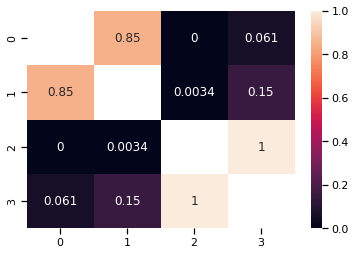

In [74]:
sns.heatmap(
    agas.pair_from_array(
        a, similarity_function=np.std,
          divergence_function=np.sum,
          similarity_weight=0.3, return_matrix=True),
    annot=True)

`agas.pair_from_wide_df` can be used to find the optimal pair of rows given a dataframe.

In [77]:
wide_df = pd.DataFrame(np.hstack([a, a ** 2]),
                  columns=['A', 'B', 'C', 'D'],
                  index=['Y1', 'Y2', 'Y3', 'Y4']).T
print(wide_df)

     Y1    Y2    Y3     Y4
A  0.00  0.50   5.0    4.0
B  0.50  0.50   5.0   10.0
C  0.00  0.25  25.0   16.0
D  0.25  0.25  25.0  100.0


On both `pair_from_wide_df` and `pair_from_array` we can use the `return_filter` argument to receive pairs with scores
within a set range. The default is to only return the first value, here we ask only for scores lower than .7.

In [86]:
indices, scores = agas.pair_from_wide_df(wide_df, np.mean, np.max,
                                         return_filter=0.7)
print(f'Indices of of rows with optimality scores below .7 - \n{indices}')
print(f'Matching scores  - {scores}')

Indices of of rows with optimality scores below .7 - 
[[2 3]
 [1 3]
 [0 1]
 [0 3]]
Matching scores  - [0.    0.486 0.514 0.514]


Selecting the optimal pair of rows - similar means, different maximal values:

In [93]:
print(
    "Aggregated: ",
    wide_df.agg([np.mean, np.max], axis=1).to_markdown(),
    "Optimal pair (raw): ",
      wide_df.iloc[indices[0], :].to_markdown(),
    sep='\n\n')


Aggregated: 

|    |    mean |   amax |
|:---|--------:|-------:|
| A  |  2.375  |      5 |
| B  |  4      |     10 |
| C  | 10.3125 |     25 |
| D  | 31.375  |    100 |

Optimal pair (raw): 

|    |   Y1 |   Y2 |   Y3 |   Y4 |
|:---|-----:|-----:|-----:|-----:|
| C  | 0    | 0.25 |   25 |   16 |
| D  | 0.25 | 0.25 |   25 |  100 |




for more examples see the [tutorial](github.io/EitanHemed/agas/tutorial).



#### Documentation
See [Here](github.io/EitanHemed/agas).


#### Bug reports
Please open an [issue](https://github.com/EitanHemed/agas/issues) on GitHub.